### **TPOTRegressor**

Automated machine learning tool for optimizing machine learning pipelines.


## **Datase**t:"*Sales_Product_Price_by_Store.csv*"

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r'D:\Machine learning\task\data\Sales_Product_Price_by_Store.csv')

# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Is_Holiday'] = df['Is_Holiday'].astype(int)
df = pd.get_dummies(df, columns=['Store', 'Product'], drop_first=True)
df.drop(columns=['Date'], inplace=True)

# Features and target variable
X = df.drop(columns=['Weekly_Units_Sold'])  # Drop target column
y = df['Weekly_Units_Sold']                  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the TPOT Regressor
tpot = TPOTRegressor(verbosity=2, random_state=42, generations=5, population_size=20)
tpot.fit(X_train, y_train)

# Get the best pipeline
print("Best Pipeline:")
print(tpot.fitted_pipeline_)

# Make predictions using the best pipeline
tpot_predictions = tpot.predict(X_test)

# Evaluate the TPOT model
tpot_mse = mean_squared_error(y_test, tpot_predictions)
tpot_r2 = r2_score(y_test, tpot_predictions)

print(f'TPOT Mean Squared Error: {tpot_mse}')
print(f'TPOT R² Score: {tpot_r2}')

# Export the best model if needed
tpot.export('best_model_pipeline.py')


c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4653.78870006543

Generation 2 - Current best internal CV score: -4653.78870006543

Generation 3 - Current best internal CV score: -4653.78870006543

Generation 4 - Current best internal CV score: -4620.089585630572

Generation 5 - Current best internal CV score: -4620.089585630572

Best pipeline: XGBRegressor(RidgeCV(input_matrix), learning_rate=0.5, max_depth=8, min_child_weight=3, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.6000000000000001, verbosity=0)
Best Pipeline:
Pipeline(steps=[('stackingestimator', StackingEstimator(estimator=RidgeCV())),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval

c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3861 entries, 0 to 3860
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Is_Holiday         3861 non-null   int64  
 1   Base Price         3861 non-null   float64
 2   Price              3861 non-null   float64
 3   Weekly_Units_Sold  3861 non-null   int64  
 4   Year               3861 non-null   int32  
 5   Month              3861 non-null   int32  
 6   Day                3861 non-null   int32  
 7   Weekday            3861 non-null   int32  
 8   Store_2            3861 non-null   bool   
 9   Store_3            3861 non-null   bool   
 10  Store_4            3861 non-null   bool   
 11  Store_5            3861 non-null   bool   
 12  Store_6            3861 non-null   bool   
 13  Store_7            3861 non-null   bool   
 14  Store_8            3861 non-null   bool   
 15  Store_10           3861 non-null   bool   
 16  Product_2          3861 

## **Model Parameter**

In [2]:
from tpot import TPOTRegressor
import pandas as pd

# Get the default parameters
params = TPOTRegressor().get_params()

# Create a DataFrame from the parameters
params_df = pd.DataFrame(params.items(), columns=['Parameter', 'Value'])

# Display the DataFrame
print(params_df)


                     Parameter  Value
0                  config_dict   None
1               crossover_rate    0.1
2                           cv      5
3         disable_update_check  False
4                   early_stop   None
5                  generations    100
6                     log_file   None
7           max_eval_time_mins      5
8                max_time_mins   None
9                       memory   None
10               mutation_rate    0.9
11                      n_jobs      1
12              offspring_size   None
13  periodic_checkpoint_folder   None
14             population_size    100
15                random_state   None
16                     scoring   None
17                   subsample    1.0
18                    template   None
19                    use_dask  False
20                   verbosity      0
21                  warm_start  False


### **To provide the parameter use**

c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


Mean Squared Error: 2510.9466128791914
Mean Absolute Error: 28.51047296603027
R² Score: 0.9482630282629698


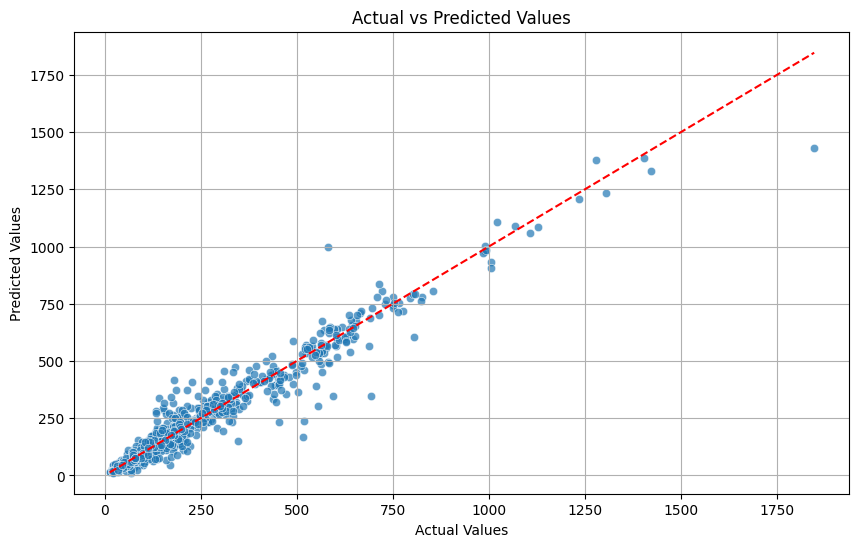

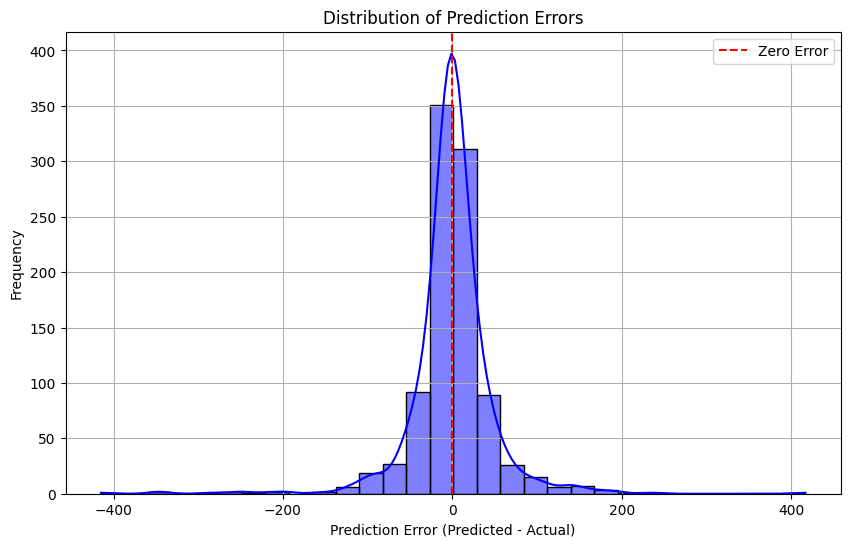

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from tpot.export_utils import set_param_recursive
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tpot_data = pd.read_csv(r'D:\Machine learning\task\data\Sales_Product_Price_by_Store.csv', sep=',')

# Convert 'Date' to datetime and extract features
tpot_data['Date'] = pd.to_datetime(tpot_data['Date'])
tpot_data['Year'] = tpot_data['Date'].dt.year
tpot_data['Month'] = tpot_data['Date'].dt.month
tpot_data['Day'] = tpot_data['Date'].dt.day
tpot_data['Weekday'] = tpot_data['Date'].dt.weekday
tpot_data = pd.get_dummies(tpot_data, columns=['Store', 'Product'], drop_first=True)
tpot_data.drop(columns=['Date'], inplace=True)

# Split the data into features and target
X = tpot_data.drop('Weekly_Units_Sold', axis=1)
y = tpot_data['Weekly_Units_Sold']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define the pipeline
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RidgeCV()),
    XGBRegressor(learning_rate=0.5, max_depth=8, min_child_weight=3, n_estimators=100,
                 n_jobs=1, objective="reg:squarederror", subsample=0.6, verbosity=0)
)

# Fit the model
exported_pipeline.fit(X_train, y_train)

# Make predictions
results = exported_pipeline.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, results)
mae = mean_absolute_error(y_test, results)
r2 = r2_score(y_test, results)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=results, alpha=0.7)  # Scatter plot of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.grid()  # Add grid lines
plt.show()  # Display the plot

# Plotting the residuals (prediction errors)
errors = results - y_test  # Calculate errors
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='blue')  # Histogram of errors with KDE
plt.axvline(0, color='red', linestyle='--', label='Zero Error')  # Line at zero error
plt.title('Distribution of Prediction Errors')  # Title of the plot
plt.xlabel('Prediction Error (Predicted - Actual)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.legend()  # Show legend
plt.grid()  # Add grid lines
plt.show()  # Display the plot


In [4]:
tpot_data.columns

Index(['Is_Holiday', 'Base Price', 'Price', 'Weekly_Units_Sold', 'Year',
       'Month', 'Day', 'Weekday', 'Store_2', 'Store_3', 'Store_4', 'Store_5',
       'Store_6', 'Store_7', 'Store_8', 'Store_10', 'Product_2', 'Product_3'],
      dtype='object')

### **Dataset:** *Tips*

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the tips dataset
tpot_data = sns.load_dataset('tips')

# Display initial info
print(tpot_data.info())

# Convert categorical columns to 'category' type if not already done
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    tpot_data[col] = tpot_data[col].astype('category')

# One-hot encode categorical features
tpot_data = pd.get_dummies(tpot_data, columns=categorical_cols, drop_first=True)

# Create new features
# 1. Tip as a percentage of the total bill
tpot_data['tip_percentage'] = (tpot_data['tip'] / tpot_data['total_bill']) * 100

# 2. Total number of people (size)
# Create a binary feature for large groups
tpot_data['is_large_group'] = (tpot_data['size'] >= 5).astype(int)

# Define features and target variable
features = tpot_data.drop('tip', axis=1)  # Dropping the target column
target = tpot_data['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [6]:


# Initialize and fit the TPOT Regressor
tpot = TPOTRegressor(verbosity=2, random_state=42, generations=5, population_size=20)
tpot.fit(X_train, y_train)

# Make predictions
y_pred = tpot.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

# Export the best pipeline
tpot.export('best_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.33535101642139775

Generation 2 - Current best internal CV score: -0.23648000000000002

Generation 3 - Current best internal CV score: -0.23648000000000002

Generation 4 - Current best internal CV score: -0.21292368087179486

Generation 5 - Current best internal CV score: -0.21292368087179486

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Mean Squared Error: 0.17059027551020386
Mean Absolute Error: 0.2206857142857142
R² Score: 0.8635246510607225


### **To provide the parameter use**

Mean Squared Error: 0.18335481950819668
Mean Absolute Error: 0.2382344262295082
R² Score: 0.8621832552329752


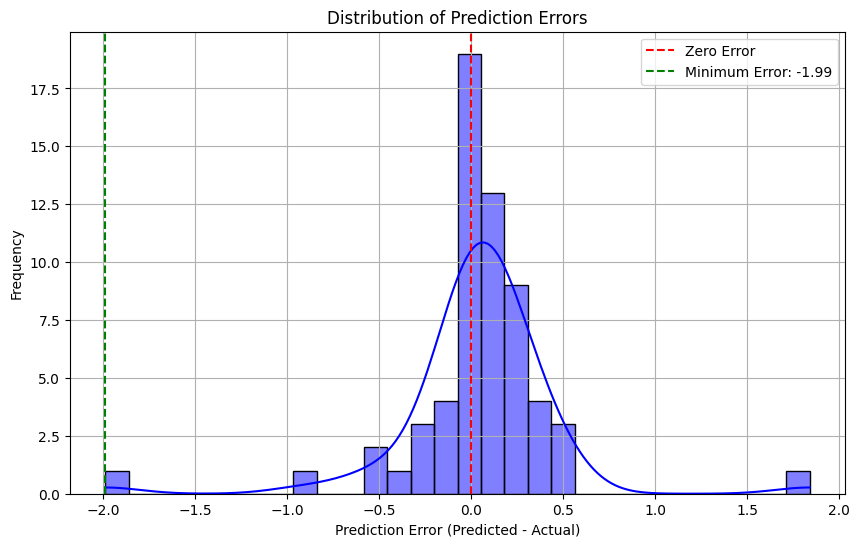

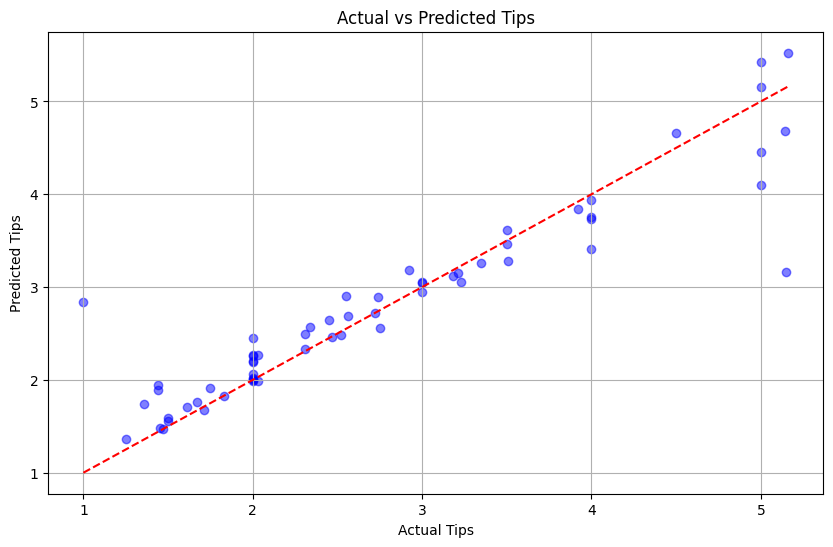

In [8]:
import numpy as np  # Importing NumPy, a library for numerical operations
import pandas as pd  # Importing Pandas, a library for data manipulation and analysis
from sklearn.ensemble import RandomForestRegressor  # Importing the Random Forest model for predictions
from sklearn.model_selection import train_test_split  # Importing a function to split data into training and testing sets
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Importing functions to evaluate model performance
import seaborn as sns  # Importing Seaborn, a library for data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Load the 'tips' dataset from Seaborn
tpot_data = sns.load_dataset('tips')

# Convert specific columns (like 'sex', 'smoker', 'day', and 'time') to 'category' type for better handling
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    tpot_data[col] = tpot_data[col].astype('category')  # Change column type

# Transform categorical columns into numeric format using one-hot encoding
tpot_data = pd.get_dummies(tpot_data, columns=categorical_cols, drop_first=True)  # Create dummy variables

# Create new features to enhance our dataset:
tpot_data['tip_percentage'] = (tpot_data['tip'] / tpot_data['total_bill']) * 100  # Calculate tip as a percentage
tpot_data['is_large_group'] = (tpot_data['size'] >= 5).astype(int)  # Indicate if group size is large (5 or more)

# Define the features (inputs) and the target variable (output)
X = tpot_data.drop('tip', axis=1)  # Features: all columns except 'tip'
y = tpot_data['tip']  # Target: the 'tip' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # Randomly split data

# Initialize the Random Forest model with specific settings
exported_pipeline = RandomForestRegressor(
    bootstrap=True,  # Use bootstrapping for the model
    max_features=0.9,  # Use 90% of features when building trees
    min_samples_leaf=1,  # Minimum samples required at a leaf node
    min_samples_split=2,  # Minimum samples required to split an internal node
    n_estimators=100,  # Number of trees in the forest
    random_state=42  # Set random state for reproducibility
)

# Train the model using the training data
exported_pipeline.fit(X_train, y_train)

# Make predictions on the testing features
results = exported_pipeline.predict(X_test)  # Predict tips using the test features

# Evaluate the model's performance using various metrics
mse = mean_squared_error(y_test, results)  # Calculate Mean Squared Error
mae = mean_absolute_error(y_test, results)  # Calculate Mean Absolute Error
r2 = r2_score(y_test, results)  # Calculate R² Score

# Display the evaluation metrics
print("Mean Squared Error:", mse)  # Print Mean Squared Error
print("Mean Absolute Error:", mae)  # Print Mean Absolute Error
print("R² Score:", r2)  # Print R² Score, indicating how well the model explains the variability in the data

# Calculate the prediction errors
errors = results - y_test  # Calculate the difference between predicted and actual tips

# Plotting the distribution of prediction errors
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(errors, bins=30, kde=True, color='blue')  # Histogram of errors with Kernel Density Estimate
plt.axvline(0, color='red', linestyle='--', label='Zero Error')  # Line at zero error for reference

# Highlighting the minimum error
min_error = np.min(errors)  # Find the minimum error
plt.axvline(min_error, color='green', linestyle='--', label='Minimum Error: {:.2f}'.format(min_error))  # Line for minimum error

# Add title and labels to the plot
plt.title('Distribution of Prediction Errors')  # Title of the plot
plt.xlabel('Prediction Error (Predicted - Actual)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.legend()  # Show the legend
plt.grid()  # Add grid lines to the plot
plt.show()  # Display the plot

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(y_test, results, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Actual vs Predicted Tips')  # Title of the plot
plt.xlabel('Actual Tips')  # X-axis label
plt.ylabel('Predicted Tips')  # Y-axis label
plt.grid()  # Add grid lines to the plot
plt.show()  # Display the plot


# PyCaret

**Description:** An open-source low-code machine learning library in Python that automates the ML workflow.

## Key Features:
- Simplified model training and evaluation.
- Built-in feature engineering and selection.
- Hyperparameter tuning and ensemble methods.


In [1]:
import pandas as pd
import seaborn as sns
from pycaret.regression import *

# Load the 'tips' dataset from Seaborn
tips_data = sns.load_dataset('tips')

# Preprocessing: Create new features
tips_data['tip_percentage'] = (tips_data['tip'] / tips_data['total_bill']) * 100
tips_data['is_large_group'] = (tips_data['size'] >= 5).astype(int)

# Initialize the PyCaret environment
# Specify the target variable (y) and the data frame
exp = setup(data=tips_data, target='tip', session_id=42,
            ignore_features=['date'],  # Ignore irrelevant features
            categorical_features=['sex', 'smoker', 'day', 'time'],  # Specify categorical features
            numeric_features=['total_bill', 'size', 'tip_percentage', 'is_large_group'])  # Numeric features

# Compare baseline models
best_model = compare_models()

# Evaluate the best model
evaluate_model(best_model)

# Make predictions on new data
predictions = predict_model(best_model)


# Display the predictions
print(predictions[['prediction_label', 'tip']])  # Use 'prediction_label' instead of 'Label'

,Description,Value
0,Session id,42
1,Target,tip
2,Target type,Regression
3,Original data shape,"(244, 9)"
4,Transformed data shape,"(244, 12)"
5,Transformed train set shape,"(170, 12)"
6,Transformed test set shape,"(74, 12)"
7,Ignore features,1
8,Numeric features,4
9,Categorical features,4


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2153,0.1163,0.3234,0.9323,0.0783,0.0760,0.1600
et,Extra Trees Regressor,0.2315,0.2166,0.4062,0.9115,0.0878,0.0808,0.2180
rf,Random Forest Regressor,0.2607,0.1878,0.4046,0.9106,0.0919,0.0914,0.4140
xgboost,Extreme Gradient Boosting,0.2732,0.1821,0.4169,0.8880,0.0962,0.0933,0.1360
knn,K Neighbors Regressor,0.2560,0.2577,0.4628,0.8877,0.0915,0.0853,0.1200
br,Bayesian Ridge,0.3147,0.2630,0.4822,0.8501,0.1153,0.1179,0.1050
huber,Huber Regressor,0.3084,0.2577,0.4805,0.8496,0.1125,0.1152,0.1260
en,Elastic Net,0.3225,0.2963,0.5124,0.8449,0.1079,0.1070,0.1610
ridge,Ridge Regression,0.3242,0.2684,0.4896,0.8448,0.1192,0.1221,0.2360
lr,Linear Regression,0.3261,0.2703,0.4920,0.8433,0.1200,0.1228,1.4380


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.1987,0.1221,0.3494,0.9074,0.0908,0.0828


     prediction_label   tip
24           3.114374  3.18
6            2.370876  2.00
153          1.968583  2.00
211          5.306114  5.16
198          2.013914  2.00
..                ...   ...
165          3.540078  3.48
154          2.375438  2.00
216          3.203367  3.00
79           2.875549  2.71
29           3.048312  3.00

[74 rows x 2 columns]


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [2]:
import pandas as pd
import seaborn as sns
from pycaret.regression import *

# Load the 'tips' dataset from Seaborn
tips_data = sns.load_dataset('tips')

# Preprocessing: Create new features
tips_data['tip_percentage'] = (tips_data['tip'] / tips_data['total_bill']) * 100
tips_data['is_large_group'] = (tips_data['size'] >= 5).astype(int)

# Initialize the PyCaret environment
exp = setup(data=tips_data, target='tip', session_id=42,
            ignore_features=[],  # Adjust if you have any irrelevant features
            categorical_features=['sex', 'smoker', 'day', 'time'],  # Specify categorical features
            numeric_features=['total_bill', 'size', 'tip_percentage', 'is_large_group'])  # Numeric features

# Compare baseline models
best_model = compare_models()

# Get the best model's name and parameters
model_name = best_model.__class__.__name__
model_params = best_model.get_params()
print(f"Best Model: {model_name}")
print("Model Parameters:")
print(model_params)

# Make predictions on new data
predictions = predict_model(best_model)


# Display the predictions
print(predictions[['prediction_label', 'tip']])  # Use 'prediction_label' instead of 'Label'


,Description,Value
0,Session id,42
1,Target,tip
2,Target type,Regression
3,Original data shape,"(244, 9)"
4,Transformed data shape,"(244, 12)"
5,Transformed train set shape,"(170, 12)"
6,Transformed test set shape,"(74, 12)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2153,0.1163,0.3234,0.9323,0.0783,0.0760,0.1620
et,Extra Trees Regressor,0.2315,0.2166,0.4062,0.9115,0.0878,0.0808,0.3540
rf,Random Forest Regressor,0.2607,0.1878,0.4046,0.9106,0.0919,0.0914,0.2680
xgboost,Extreme Gradient Boosting,0.2732,0.1821,0.4169,0.8880,0.0962,0.0933,0.1420
knn,K Neighbors Regressor,0.2560,0.2577,0.4628,0.8877,0.0915,0.0853,0.1110
br,Bayesian Ridge,0.3147,0.2630,0.4822,0.8501,0.1153,0.1179,0.1590
huber,Huber Regressor,0.3084,0.2577,0.4805,0.8496,0.1125,0.1152,0.1980
en,Elastic Net,0.3225,0.2963,0.5124,0.8449,0.1079,0.1070,0.0920
ridge,Ridge Regression,0.3242,0.2684,0.4896,0.8448,0.1192,0.1221,0.0890
lr,Linear Regression,0.3261,0.2703,0.4920,0.8433,0.1200,0.1228,0.0960


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Best Model: GradientBoostingRegressor
Model Parameters:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.1987,0.1221,0.3494,0.9074,0.0908,0.0828


     prediction_label   tip
24           3.114374  3.18
6            2.370876  2.00
153          1.968583  2.00
211          5.306114  5.16
198          2.013914  2.00
..                ...   ...
165          3.540078  3.48
154          2.375438  2.00
216          3.203367  3.00
79           2.875549  2.71
29           3.048312  3.00

[74 rows x 2 columns]


from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Simple RandomForestRegressor**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
tpot_data = pd.read_csv('/content/Sales_Product_Price_by_Store.csv')  # Adjust the path as necessary

# Feature Engineering
tpot_data['Date'] = pd.to_datetime(tpot_data['Date'])  # Convert Date to datetime
tpot_data['Year'] = tpot_data['Date'].dt.year
tpot_data['Month'] = tpot_data['Date'].dt.month
tpot_data['Day'] = tpot_data['Date'].dt.day
tpot_data['Weekday'] = tpot_data['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
tpot_data['Is_Holiday'] = tpot_data['Is_Holiday'].astype(int)  # Ensure Is_Holiday is an int

# One-hot encoding for categorical features
tpot_data = pd.get_dummies(tpot_data, columns=['Store', 'Product'], drop_first=True)

# Drop the original Date column
tpot_data.drop(columns=['Date'], inplace=True)

# Define features and target variable
features = tpot_data.drop(columns=['Weekly_Units_Sold'])  # Drop target column
target = tpot_data['Weekly_Units_Sold']  # Target column

# Split the dataset into training and testing sets
training_features, testing_features, training_target, testing_target = \
    train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor( random_state=42)

# Fit the model
model.fit(training_features, training_target)

# Make predictions
predictions = model.predict(testing_features)

# Evaluate the model's performance
mse = mean_squared_error(testing_target, predictions)  # Mean Squared Error
mae = mean_absolute_error(testing_target, predictions)  # Mean Absolute Error
r2 = r2_score(testing_target, predictions)  # R² Score

# Display the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Squared Error: 3977.694176584735
Mean Absolute Error: 26.876157826649415
R² Score: 0.9229712227837235


### **RandomForestRegressor**

Mean Squared Error: 3266.16300916149
Mean Absolute Error: 25.833312629399586
R² Score: 0.9327021202176186


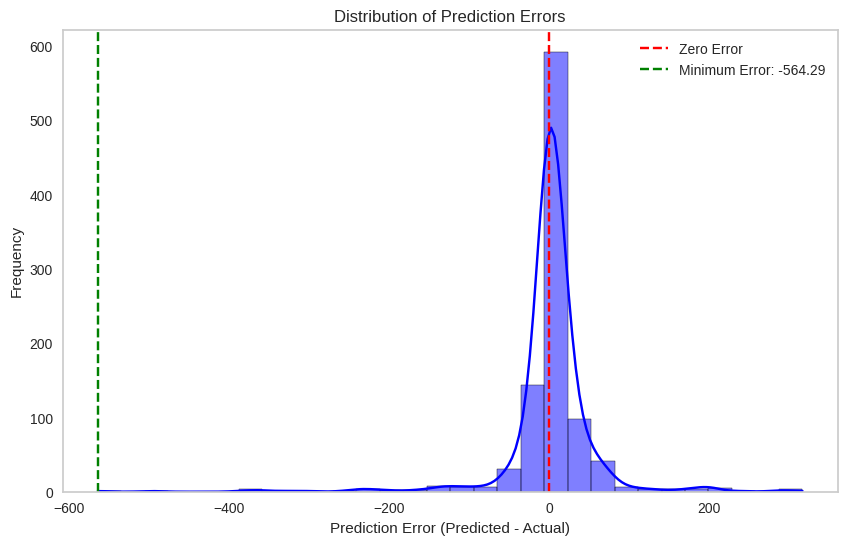

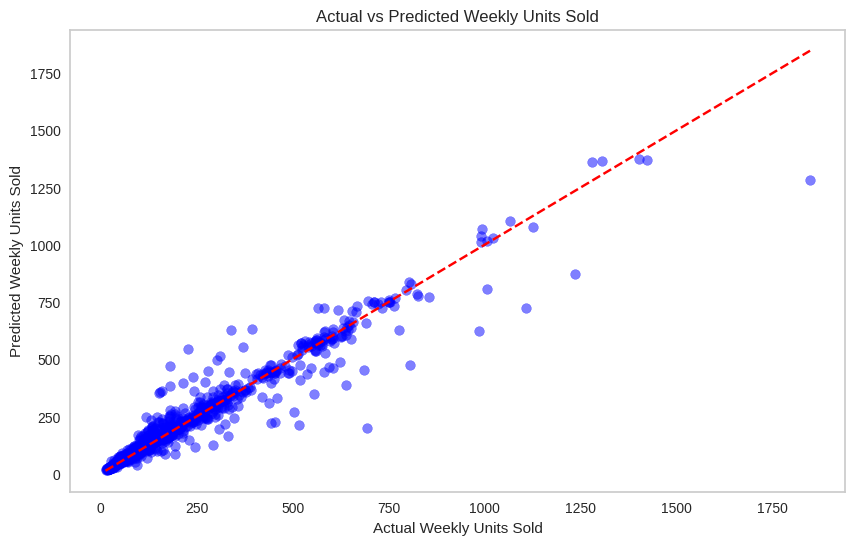

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
tpot_data = pd.read_csv('/content/Sales_Product_Price_by_Store.csv')  # Adjust the path as necessary

# Feature Engineering
tpot_data['Date'] = pd.to_datetime(tpot_data['Date'])  # Convert Date to datetime
tpot_data['Year'] = tpot_data['Date'].dt.year
tpot_data['Month'] = tpot_data['Date'].dt.month
tpot_data['Day'] = tpot_data['Date'].dt.day
tpot_data['Weekday'] = tpot_data['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
tpot_data['Is_Holiday'] = tpot_data['Is_Holiday'].astype(int)  # Ensure Is_Holiday is an int

# One-hot encoding for categorical features
tpot_data = pd.get_dummies(tpot_data, columns=['Store', 'Product'], drop_first=True)

# Drop the original Date column and the target column
tpot_data.drop(columns=['Date'], inplace=True)

# Define features and target variable
features = tpot_data.drop(columns=['Weekly_Units_Sold'])  # Drop target column
target = tpot_data['Weekly_Units_Sold']  # Target column

# Split the dataset into training and testing sets
training_features, testing_features, training_target, testing_target = \
    train_test_split(features, target, random_state=42)

# Initialize the Random Forest model
exported_pipeline = RandomForestRegressor(
    bootstrap=True,
    max_features=0.9,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42  # Fix random state for reproducibility
)

# Fit the model
exported_pipeline.fit(training_features, training_target)

# Make predictions
results = exported_pipeline.predict(testing_features)

# Evaluate the model's performance using various metrics
mse = mean_squared_error(testing_target, results)  # Calculate Mean Squared Error
mae = mean_absolute_error(testing_target, results)  # Calculate Mean Absolute Error
r2 = r2_score(testing_target, results)  # Calculate R² Score

# Display the evaluation metrics
print("Mean Squared Error:", mse)  # Print Mean Squared Error
print("Mean Absolute Error:", mae)  # Print Mean Absolute Error
print("R² Score:", r2)  # Print R² Score, indicating how well the model explains the variability in the data

# Calculate the prediction errors
errors = results - testing_target  # Calculate the difference between predicted and actual values

# Plotting the distribution of prediction errors
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(errors, bins=30, kde=True, color='blue')  # Histogram of errors with Kernel Density Estimate
plt.axvline(0, color='red', linestyle='--', label='Zero Error')  # Line at zero error for reference

# Highlighting the minimum error
min_error = np.min(errors)  # Find the minimum error
plt.axvline(min_error, color='green', linestyle='--', label='Minimum Error: {:.2f}'.format(min_error))  # Line for minimum error

# Add title and labels to the plot
plt.title('Distribution of Prediction Errors')  # Title of the plot
plt.xlabel('Prediction Error (Predicted - Actual)')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.legend()  # Show the legend
plt.grid()  # Add grid lines to the plot
plt.show()  # Display the plot

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(testing_target, results, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([testing_target.min(), testing_target.max()], [testing_target.min(), testing_target.max()], color='red', linestyle='--')  # Line for perfect prediction
plt.title('Actual vs Predicted Weekly Units Sold')  # Title of the plot
plt.xlabel('Actual Weekly Units Sold')  # X-axis label
plt.ylabel('Predicted Weekly Units Sold')  # Y-axis label
plt.grid()  # Add grid lines to the plot
plt.show()  # Display the plot


In [5]:
import pandas as pd
from pycaret.regression import *

# Load the dataset
df = pd.read_csv('/content/Sales_Product_Price_by_Store.csv')

# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday, 6 = Sunday
df['Is_Holiday'] = df['Is_Holiday'].astype(int)

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Store', 'Product'], drop_first=True)

# Convert boolean columns to integer (0 and 1)
bool_columns = ['Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
                'Store_7', 'Store_8', 'Store_10', 'Product_2', 'Product_3']
df[bool_columns] = df[bool_columns].astype(int)

# Drop the original Date column
df.drop(columns=['Date'], inplace=True)

# Print the columns to verify
print("Columns in DataFrame:", df.columns.tolist())

# Initialize the PyCaret environment
exp = setup(data=df, target='Weekly_Units_Sold', session_id=42,
            categorical_features=bool_columns,
            numeric_features=['Is_Holiday', 'Base Price', 'Price', 'Year',
                             'Month', 'Day', 'Weekday'])

# Compare models and select the best one
best_model = compare_models()

# Get the best model's name and parameters
model_name = best_model.__class__.__name__
model_params = best_model.get_params()
print(f"Best Model: {model_name}")
print("Model Parameters:")
print(model_params)


# Make predictions on the dataset
predictions = predict_model(best_model)

# Display the predictions
print(predictions[['prediction_label', 'Weekly_Units_Sold']])  # Adjust as needed


Columns in DataFrame: ['Is_Holiday', 'Base Price', 'Price', 'Weekly_Units_Sold', 'Year', 'Month', 'Day', 'Weekday', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_10', 'Product_2', 'Product_3']


,Description,Value
0,Session id,42
1,Target,Weekly_Units_Sold
2,Target type,Regression
3,Original data shape,"(3861, 18)"
4,Transformed data shape,"(3861, 18)"
5,Transformed train set shape,"(2702, 18)"
6,Transformed test set shape,"(1159, 18)"
7,Numeric features,7
8,Categorical features,10
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,23.9129,3083.4979,55.1209,0.9458,0.1923,0.1245,0.7580
xgboost,Extreme Gradient Boosting,24.9082,4012.2341,59.8745,0.9291,0.2689,0.1553,0.2370
lightgbm,Light Gradient Boosting Machine,33.1871,4862.0505,68.6382,0.9170,0.3062,0.1945,0.3920
rf,Random Forest Regressor,29.1148,5742.2999,72.3599,0.8985,0.2145,0.1500,0.9700
gbr,Gradient Boosting Regressor,43.3534,8940.7264,92.5522,0.8489,0.3999,0.2738,0.5650
dt,Decision Tree Regressor,34.7209,8744.6788,90.6838,0.8434,0.2717,0.1785,0.1680
ridge,Ridge Regression,100.1072,22396.0512,148.6051,0.6169,0.7750,0.8840,0.2790
br,Bayesian Ridge,100.0230,22396.5543,148.6039,0.6169,0.7750,0.8813,0.1680
lar,Least Angle Regression,100.2353,22397.4957,148.6150,0.6168,0.7774,0.8880,0.1690
lr,Linear Regression,100.2353,22397.4957,148.6150,0.6168,0.7774,0.8880,0.1710


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Best Model: ExtraTreesRegressor
Model Parameters:
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,23.0951,2709.9855,52.0575,0.9463,0.1947,0.1214


      prediction_label  Weekly_Units_Sold
2424            284.99                261
3290             69.11                 66
2575            113.55                138
2042             82.75                 89
3717            568.60                558
...                ...                ...
1151             18.93                 29
2381            344.79                318
1053            111.52                118
3204            233.31                224
22              144.64                118

[1159 rows x 2 columns]


from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/loan_data.csv')  # Update with your dataset path

# Encode categorical variables if necessary
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])  # Assuming 'purpose' is the only categorical variable

# Define features and target variable
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Individual models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Fit each model, predict, and calculate R² score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Ensemble model using Voting
voting_regressor = VotingRegressor(estimators=[(name, model) for name, model in models.items()])
voting_regressor.fit(X_train, y_train)

# Predict on the test set with the ensemble model
y_pred_voting = voting_regressor.predict(X_test)

# R² score for the ensemble model
r2_voting = r2_score(y_test, y_pred_voting)
results['Voting Ensemble'] = r2_voting

# Stacking
estimators = [(name, model) for name, model in models.items() if name != 'Linear Regression']  # Exclude Linear Regression
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
y_pred_stacking = stacking_model.predict(X_test)
r2_stacking = r2_score(y_test, y_pred_stacking)
results['Stacking Ensemble'] = r2_stacking

# Display results
print("R² Scores:")
for model, r2 in results.items():
    print(f"{model}: {r2:.2f}")

# Plotting the results r2 square
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('R² Score for Different Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjusted for R² score range
plt.axhline(0, color='red', linestyle='--')  # Line at R² = 0 for reference
plt.show()



# Plotting the results Mean square error
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Mean Squared Error for Different Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.ylim(0, max(results.values()) * 1.1)  # Slightly extend y-axis for better visibility
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/content/loan_data.csv'

In [16]:
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,2,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,0,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,4,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,2,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [7]:
!pip install scikit-learn==0.23.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 24.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [12]:
import pandas as pd
from pycaret.classification import *



# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
data = pd.read_csv('/content/loan_data.csv')  # Adjust the path as necessary

# Display the data types and structure
print(data.info())

# Initialize the PyCaret environment
# Specify the target variable as 'not.fully.paid'
exp = setup(data=data, target='not.fully.paid', session_id=42,
            categorical_features=['purpose'],
            numeric_features=['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
                             'dti', 'fico', 'days.with.cr.line', 'revol.bal',
                             'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'])
            # Remove silent=True

# Compare baseline models
best_model = compare_models()

# Finalize the best model for predictions
final_model = finalize_model(best_model)

# Make predictions on the entire dataset (or new data)
predictions = predict_model(final_model)

# Display the predictions
print(predictions[['prediction_label', 'not.fully.paid']])  # Adjust as necessary based on your column names

# Evaluate the model performance
evaluate_model(final_model)

# Optionally save the model
save_model(final_model, 'best_model')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


,Description,Value
0,Session id,42
1,Target,not.fully.paid
2,Target type,Binary
3,Original data shape,"(9578, 14)"
4,Transformed data shape,"(9578, 20)"
5,Transformed train set shape,"(6704, 20)"
6,Transformed test set shape,"(2874, 20)"
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8399,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1060
ridge,Ridge Classifier,0.8396,0.6838,0.0084,0.2750,0.0162,0.0105,0.0325,0.1100
gbc,Gradient Boosting Classifier,0.8395,0.6787,0.0336,0.4775,0.0625,0.0426,0.0919,1.7470
lr,Logistic Regression,0.8391,0.6721,0.0242,0.4333,0.0456,0.0298,0.0706,0.9700
ada,Ada Boost Classifier,0.8385,0.6734,0.0429,0.4697,0.0779,0.0518,0.1002,0.5790
rf,Random Forest Classifier,0.8382,0.6519,0.0214,0.4126,0.0405,0.0246,0.0611,1.6880
lda,Linear Discriminant Analysis,0.8376,0.6840,0.0475,0.4378,0.0851,0.0555,0.0993,0.1070
et,Extra Trees Classifier,0.8361,0.6407,0.0345,0.3743,0.0628,0.0367,0.0707,1.0910
lightgbm,Light Gradient Boosting Machine,0.8349,0.6521,0.0559,0.3970,0.0978,0.0601,0.0972,0.9900
xgboost,Extreme Gradient Boosting,0.8247,0.6204,0.0885,0.3321,0.1387,0.0758,0.0974,0.3430


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.8399,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


      prediction_label  not.fully.paid
1102                 0               0
5350                 0               0
3323                 0               0
2147                 0               0
7471                 0               0
...                ...             ...
3196                 0               0
7981                 0               0
271                  0               1
3259                 0               0
466                  0               0

[2874 rows x 2 columns]


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['credit.policy', 'int.rate',
                                              'installment', 'log.annual.inc',
                                              'dti', 'fico', 'days.with.cr.line',
                                              'revol.bal', 'revol.util',
                                              'inq.last.6mths', 'delinq.2yrs',
                                              'pub.rec'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_fe...
                                                               drop_invariant=False,
                     

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2874 entries, 1102 to 466
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   credit.policy      2874 non-null   int8    
 1   purpose            2874 non-null   category
 2   int.rate           2874 non-null   float32 
 3   installment        2874 non-null   float32 
 4   log.annual.inc     2874 non-null   float32 
 5   dti                2874 non-null   float32 
 6   fico               2874 non-null   int32   
 7   days.with.cr.line  2874 non-null   float32 
 8   revol.bal          2874 non-null   int32   
 9   revol.util         2874 non-null   float32 
 10  inq.last.6mths     2874 non-null   int8    
 11  delinq.2yrs        2874 non-null   int8    
 12  pub.rec            2874 non-null   int8    
 13  not.fully.paid     2874 non-null   int8    
 14  prediction_label   2874 non-null   int64   
 15  prediction_score   2874 non-null   float64 
dtypes: catego